In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Define the function for Monte Carlo simulation
def eval_MonteCarlo(M):
    xy = np.random.uniform(0, 1, (2, M))  # Generate M (x,y) pairs
    value = xy[0,:]**2 + xy[1,:]**2  # Check if inside the unit circle
    num_hits = (value <= 1).sum()  # Count hits
    return [M, num_hits / M]  # Return M and approximated area

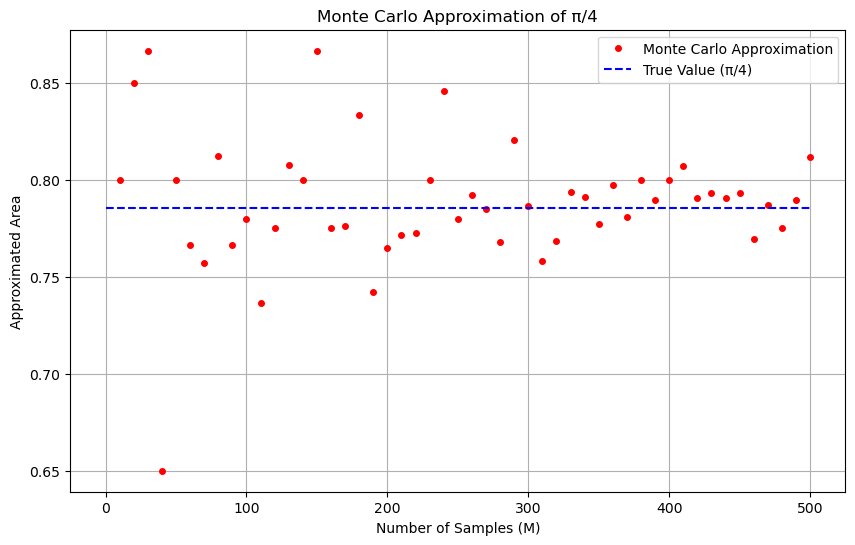

In [7]:
# Part (a)-(c): Perform simulations for M = 10, 20, ..., 500 and plot
M_values = list(range(10, 501, 10))
results = []
for M in M_values:
    results.append(eval_MonteCarlo(M))
results = np.array(results)

plt.figure(figsize=(10, 6))
plt.plot(results[:, 0], results[:, 1], 'ro',
         markersize=4, label='Monte Carlo Approximation')
plt.hlines(np.pi/4, 0, 500, colors='blue',
           linestyles='dashed', label='True Value (π/4)')
plt.xlabel('Number of Samples (M)')
plt.ylabel('Approximated Area')
plt.title('Monte Carlo Approximation of π/4')
plt.grid(True)
plt.legend()
plt.show()

In [8]:
# Part (d): Compare with Midpoint Rule
def f(x):
    return np.sqrt(1 - x**2)


def midpoint_rule_error(M):
    approximation = sum(f((i + 0.5)/M) / M for i in range(M))
    return np.abs(approximation - np.pi/4)


# Compute Monte Carlo error with 100,000 samples
M_mc = 100000
mc_result = eval_MonteCarlo(M_mc)
mc_error = np.abs(mc_result[1] - np.pi/4)
print(f"Monte Carlo Absolute Error (M=100,000): {mc_error:.6f}")

# Find minimal M for Midpoint Rule to beat the error
M_mid = 1
while True:
    error = midpoint_rule_error(M_mid)
    if error < mc_error:
        break
    M_mid += 1

print(f"Midpoint Rule requires M = {M_mid} to achieve error < {mc_error:.6f}")

Monte Carlo Absolute Error (M=100,000): 0.000708
Midpoint Rule requires M = 25 to achieve error < 0.000708
